# Weekly Data Series Analysis

In [113]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
import scipy.stats as stats
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.stattools import jarque_bera
import statsmodels.stats.descriptivestats as ds

In [2]:
def parser(s):
        return datetime.strptime(s, '%d/%m/%Y')

# Read Price Level Data

In [3]:
#Read Gas Price Data
gas_price_df= pd.read_csv(r'C:\Users\Anthony\Desktop\gas_price_clean_w.csv', parse_dates=[0], index_col=0, date_parser=parser)
print(gas_price_df.shape)
gas_price_df = gas_price_df.rename(columns={'Return':'Gas Price'})
gas_price_df.head(5)


(78, 1)


,Price
Date,
2020-08-07,2.13
2020-08-14,2.17
2020-08-21,2.39
2020-08-28,2.52
2020-09-04,2.16


In [75]:
#Read Bitcoin Price Data
bitcoin_price_df = pd.read_csv(r'C:\Users\Anthony\Desktop\bitcoin_price_clean_w.csv', parse_dates=[0], index_col=0, date_parser=parser)
print(bitcoin_price_df.shape)
bitcoin_price_df = bitcoin_price_df.rename(columns={'Return':'Bitcoin Price'})
bitcoin_price_df.head(5)


(78, 1)


,Price
Date,
2020-08-07,11581.41
2020-08-14,11748.47
2020-08-21,11824.11
2020-08-28,11516.66
2020-09-04,10866.25


In [5]:
#Read Oil Price Data
oil_price_df = pd.read_csv(r'C:\Users\Anthony\Desktop\oil_price_clean_w.csv', parse_dates=[0], index_col=0, date_parser=parser)
print(oil_price_df.shape)
oil_price_df = oil_price_df.rename(columns={'Return':'Oil Price'})
oil_price_df.head(5)

(78, 1)


,Price
Date,
2020-08-07,41.57
2020-08-14,42.08
2020-08-21,42.73
2020-08-28,42.93
2020-09-04,41.84


In [6]:
#Read Coal Price Data
coal_price_df = pd.read_csv(r'C:\Users\Anthony\Desktop\coal_price_clean_w.csv', parse_dates=[0], index_col=0, date_parser=parser)
print(coal_price_df.shape)
coal_price_df = coal_price_df.rename(columns={'Return':'Coal Price'})
coal_price_df.head(5)

(78, 1)


,Price
Date,
2020-08-07,11.6
2020-08-14,11.6
2020-08-21,11.6
2020-08-28,11.6
2020-09-04,11.7


# Stationarity Tests for Price Level Data

In [7]:
#Function to calculate Augmented Dickey-Fuller Test
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Used Lag: %f' % result[2])
    print ('Maximized IC: %f' % result[5])
    if result[0] < result[4]['5%']:
        print('Reject H0 - Time Series is Stationary')
    else:
        print('Failed to Reject H0 - Time Series is Non-Stationary')

In [8]:
#Stationarity test for US Natural Gas Price - Augmented Dickey-Fuller test
gas_price_array = gas_price_df.to_numpy()
perform_adf_test(gas_price_array)

ADF Statistic: -4.769345
p-value: 0.000062
Used Lag: 0.000000
Maximized IC: 222.651175
Reject H0 - Time Series is Stationary


In [9]:
#Stationarity test for Bitcoin Price - Augmented Dickey-Fuller test
#bit_price_array = bitcoin_price_df.to_numpy()
#perform_adf_test(bit_price_array)

In [10]:
#Stationarity test for US Oil Price - Augmented Dickey-Fuller test
oil_price_array = oil_price_df.to_numpy()
perform_adf_test(oil_price_array)

ADF Statistic: -0.717337
p-value: 0.842208
Used Lag: 7.000000
Maximized IC: 295.508749
Failed to Reject H0 - Time Series is Non-Stationary


In [11]:
#Stationarity test for US Coal Price - Augmented Dickey-Fuller test
coal_price_array = coal_price_df.to_numpy()
perform_adf_test(coal_price_array)

ADF Statistic: -1.024461
p-value: 0.744239
Used Lag: 0.000000
Maximized IC: 286.732274
Failed to Reject H0 - Time Series is Non-Stationary


# Time Series Plots: Level Data

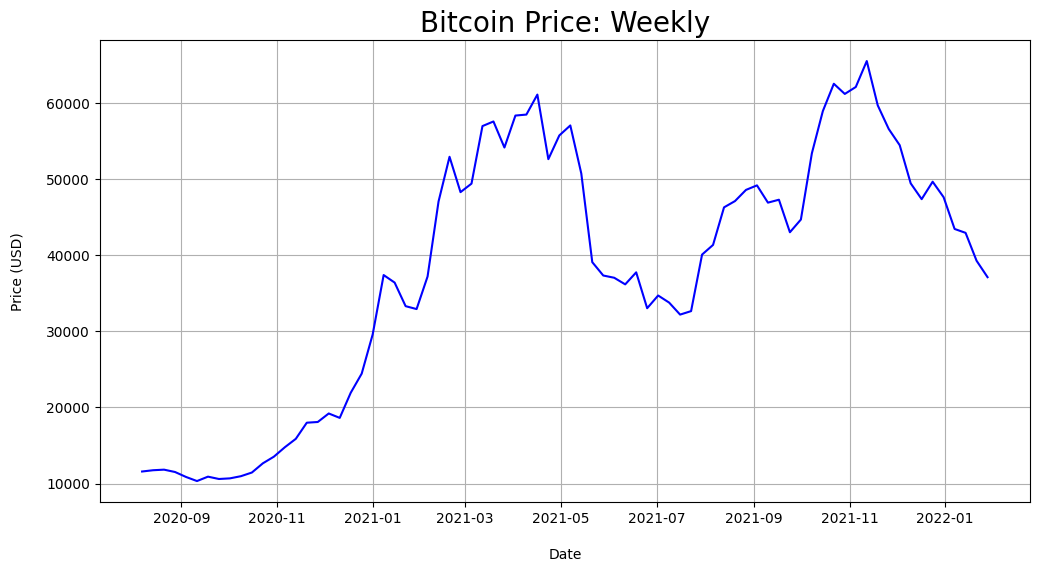

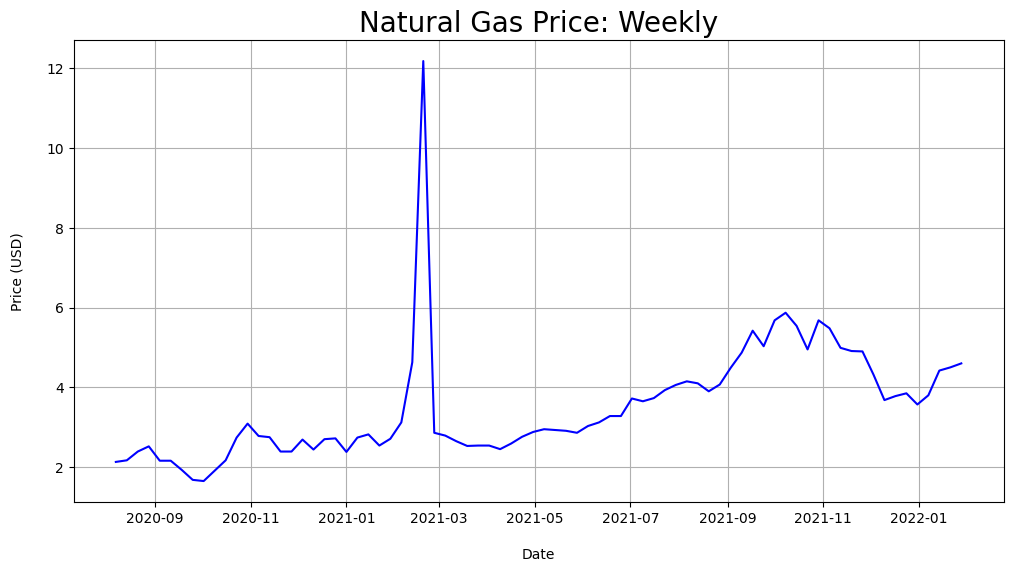

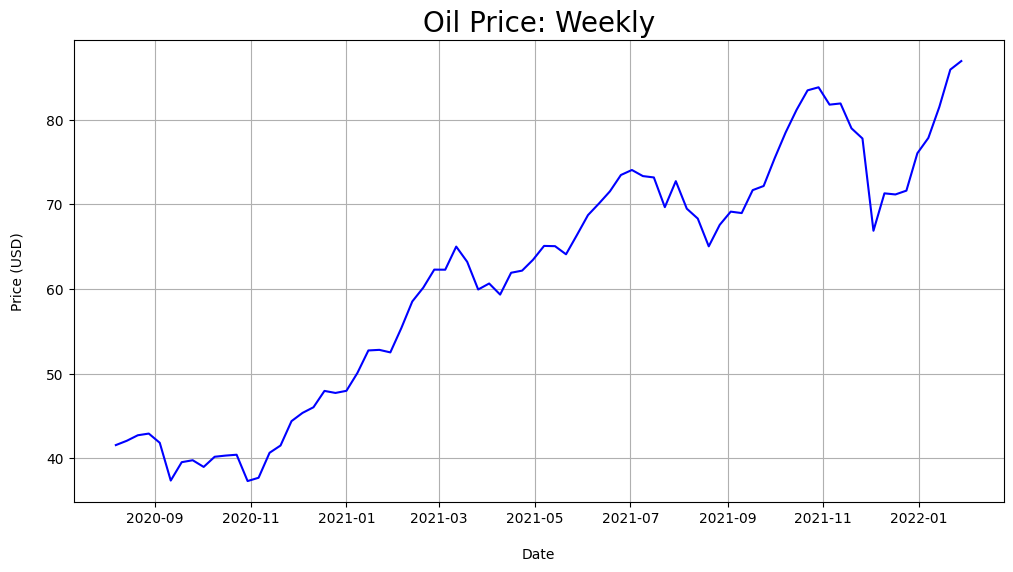

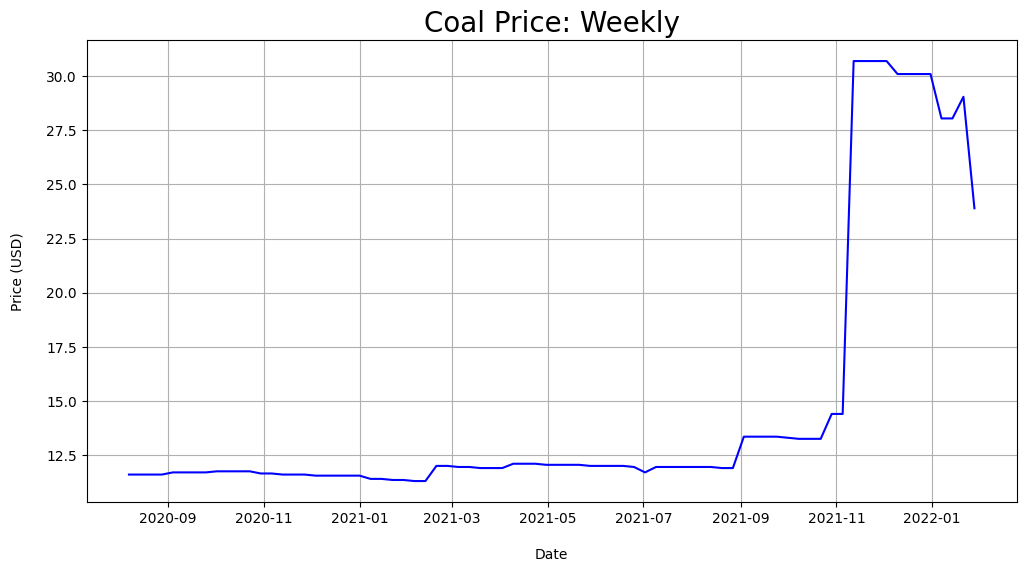

In [205]:
plt.figure(figsize=(12,6))
bitcoin_price, = plt.plot(bitcoin_price_df, color='blue')
plt.title('Bitcoin Price: Weekly', fontsize=20)
plt.ylabel('Price (USD)', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)
plt.grid()
#plt.savefig('weekly bitcoin price.png')


plt.figure(figsize=(12,6))
gas_price, = plt.plot(gas_price_df, color='blue')
plt.title('Natural Gas Price: Weekly', fontsize=20)
plt.ylabel('Price (USD)', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)
plt.grid()
#plt.savefig('weekly ng price.png')

plt.figure(figsize=(12,6))
oil_price, = plt.plot(oil_price_df, color='blue')
plt.title('Oil Price: Weekly', fontsize=20)
plt.ylabel('Price (USD)', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)
plt.grid()
#plt.savefig('weekly oil price.png')

plt.figure(figsize=(12,6))
coal_price, = plt.plot(coal_price_df, color='blue')
plt.title('Coal Price: Weekly', fontsize=20)
plt.ylabel('Price (USD)', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)
plt.grid()
#plt.savefig('weekly coal price.png')

#

# Read Log-Return Data

In [156]:
#Read Gas Returns Data
gas_return_df = pd.read_csv(r'C:\Users\Anthony\Desktop\gas_return_clean_w.csv', parse_dates=[0], index_col=0, date_parser=parser)
print(gas_return_df.shape)
gas_return_df = gas_return_df.rename(columns={'Return':'Nat Gas Return'})
gas_return_df.head(5)


(78, 1)


,Nat Gas Return
Date,
2020-08-07,0.0683
2020-08-14,0.0081
2020-08-21,0.0419
2020-08-28,0.0230
2020-09-04,-0.0669


In [13]:
#Read Bitcoin Returns Data
bitcoin_return_df = pd.read_csv(r'C:\Users\Anthony\Desktop\bitcoin_return_clean_w.csv', parse_dates=[0], index_col=0, date_parser=parser)
print(bitcoin_return_df.shape)
bitcoin_return_df = bitcoin_return_df.rename(columns={'Return':'Bitcoin Return'})
bitcoin_return_df.head(5)


(78, 1)


,Bitcoin Return
Date,
2020-08-07,0.01387
2020-08-14,0.00622
2020-08-21,0.00279
2020-08-28,-0.01144
2020-09-04,-0.02525


In [14]:
#Read Oil Returns Data
oil_return_df = pd.read_csv(r'C:\Users\Anthony\Desktop\oil_return_clean_w.csv', parse_dates=[0], index_col=0, date_parser=parser)
print(oil_return_df.shape)
oil_return_df = oil_return_df.rename(columns={'Return':'Oil Return'})
oil_return_df.head(5)


(78, 1)


,Oil Return
Date,
2020-08-07,0.009292
2020-08-14,0.005296
2020-08-21,0.006657
2020-08-28,0.002028
2020-09-04,-0.011169


In [15]:
#Read Coal Returns Data
coal_return_df = pd.read_csv(r'C:\Users\Anthony\Desktop\coal_return_clean_w.csv', parse_dates=[0], index_col=0, date_parser=parser)
print(coal_return_df.shape)
coal_return_df = coal_return_df.rename(columns={'Return':'Coal Return'})
coal_return_df.head(5)


(78, 1)


,Coal Return
Date,
2020-08-07,-0.014723
2020-08-14,0.000000
2020-08-21,0.000000
2020-08-28,0.000000
2020-09-04,0.003728


# Clean Dataframes

## Merge Dataframs

In [157]:
#Bitcoin & Gas dataframe merge
bit_gas_merge_df = bitcoin_return_df.merge(gas_return_df, how='left', on=['Date']) 
bit_gas_merge_df.head(10)

#Bitcoin-Gas & Oil dataframe merge
bit_gas_oil_merge_df = bit_gas_merge_df.merge(oil_return_df, how='left', on=['Date'])
bit_gas_oil_merge_df.head(10)

#Bitcoin-Gas-Oil & Coal dataframe merge
bit_gas_oil_coal_merge_df = bit_gas_oil_merge_df.merge(coal_return_df, how='left', on=['Date'])
bit_gas_oil_coal_merge_df.head(10)

,Bitcoin Return,Nat Gas Return,Oil Return,Coal Return
Date,,,,
2020-08-07,0.01387,0.0683,0.009292,-0.014723
2020-08-14,0.00622,0.0081,0.005296,0.000000
2020-08-21,0.00279,0.0419,0.006657,0.000000
2020-08-28,-0.01144,0.0230,0.002028,0.000000
2020-09-04,-0.02525,-0.0669,-0.011169,0.003728
2020-09-11,-0.02208,0.0000,-0.048952,0.000000
2020-09-18,0.02365,-0.0489,0.024507,0.000000
2020-09-25,-0.01241,-0.0602,0.002518,0.000000
2020-10-02,0.00337,-0.0078,-0.008712,0.001852


## Drop NaN values

In [158]:
#Drop NaN values
var_df = bit_gas_oil_coal_merge_df.dropna()
var_df.shape
                       
print(var_df)

            Bitcoin Return  Nat Gas Return  Oil Return  Coal Return
Date                                                               
2020-08-07         0.01387          0.0683    0.009292    -0.014723
2020-08-14         0.00622          0.0081    0.005296     0.000000
2020-08-21         0.00279          0.0419    0.006657     0.000000
2020-08-28        -0.01144          0.0230    0.002028     0.000000
2020-09-04        -0.02525         -0.0669   -0.011169     0.003728
...                    ...             ...         ...          ...
2021-12-31        -0.01819         -0.0328    0.026004     0.000000
2022-01-07        -0.03980          0.0271    0.010215    -0.030634
2022-01-14        -0.00516          0.0656    0.019950     0.000000
2022-01-21        -0.03869          0.0078    0.022881     0.015213
2022-01-28        -0.02460          0.0095    0.005075    -0.084748

[78 rows x 4 columns]


In [159]:
var_2_df = var_df.drop('Bitcoin Return',axis=1)
print(var_df)
print(var_2_df)

            Bitcoin Return  Nat Gas Return  Oil Return  Coal Return
Date                                                               
2020-08-07         0.01387          0.0683    0.009292    -0.014723
2020-08-14         0.00622          0.0081    0.005296     0.000000
2020-08-21         0.00279          0.0419    0.006657     0.000000
2020-08-28        -0.01144          0.0230    0.002028     0.000000
2020-09-04        -0.02525         -0.0669   -0.011169     0.003728
...                    ...             ...         ...          ...
2021-12-31        -0.01819         -0.0328    0.026004     0.000000
2022-01-07        -0.03980          0.0271    0.010215    -0.030634
2022-01-14        -0.00516          0.0656    0.019950     0.000000
2022-01-21        -0.03869          0.0078    0.022881     0.015213
2022-01-28        -0.02460          0.0095    0.005075    -0.084748

[78 rows x 4 columns]
            Nat Gas Return  Oil Return  Coal Return
Date                                     

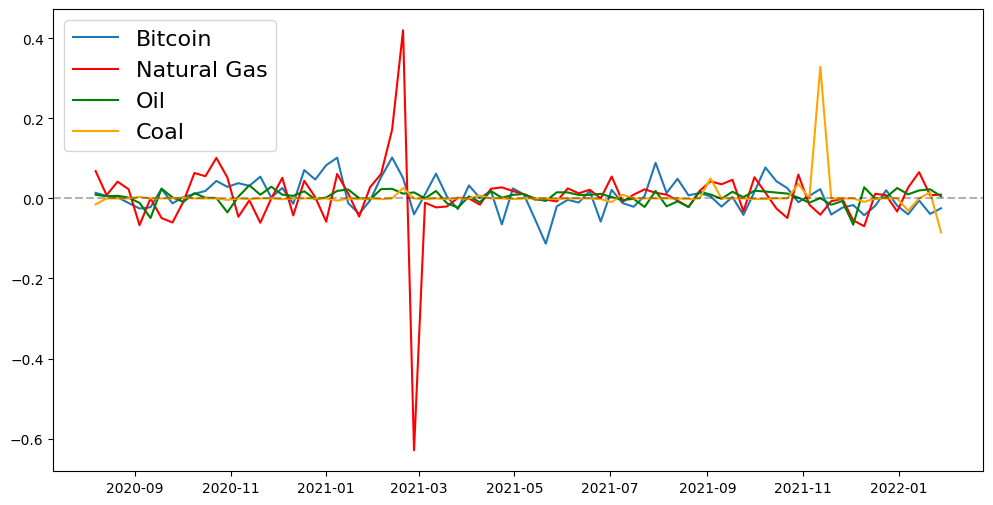

In [160]:
#Plot Returns
plt.figure(figsize=(12,6))
bitcoin, = plt.plot(var_df['Bitcoin Return'])
gas, = plt.plot(var_df['Nat Gas Return'], color='red')
oil, = plt.plot(var_df['Oil Return'], color='green')
coal, = plt.plot(var_df['Coal Return'], color='orange')
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.legend(['Bitcoin', 'Natural Gas', 'Oil', 'Coal'], fontsize=16)

# Stationarity Tests for Log-Differenced Data

In [20]:
#Stationarity test for US Natural Gas Return - Augmented Dickey-Fuller test
gas_array = gas_return_df.to_numpy()
perform_adf_test(gas_array)

ADF Statistic: -7.961509
p-value: 0.000000
Used Lag: 1.000000
Maximized IC: -114.622618
Reject H0 - Time Series is Stationary


In [21]:
#Stationarity test for Bitcoin Return - Augmented Dickey-Fuller test
bit_array = bitcoin_return_df.to_numpy()
perform_adf_test(bit_array)

ADF Statistic: -6.103939
p-value: 0.000000
Used Lag: 0.000000
Maximized IC: -233.703627
Reject H0 - Time Series is Stationary


In [22]:
#Stationarity test for US Oil Return - Augmented Dickey-Fuller test
oil_array = oil_return_df.to_numpy()
perform_adf_test(oil_array)

ADF Statistic: -5.203111
p-value: 0.000009
Used Lag: 1.000000
Maximized IC: -352.405214
Reject H0 - Time Series is Stationary


In [23]:
#Stationarity test for US Coal Return - Augmented Dickey-Fuller test
oil_array = oil_return_df.to_numpy()
perform_adf_test(oil_array)

ADF Statistic: -5.203111
p-value: 0.000009
Used Lag: 1.000000
Maximized IC: -352.405214
Reject H0 - Time Series is Stationary


# Time Series Plots: Log-Return Data

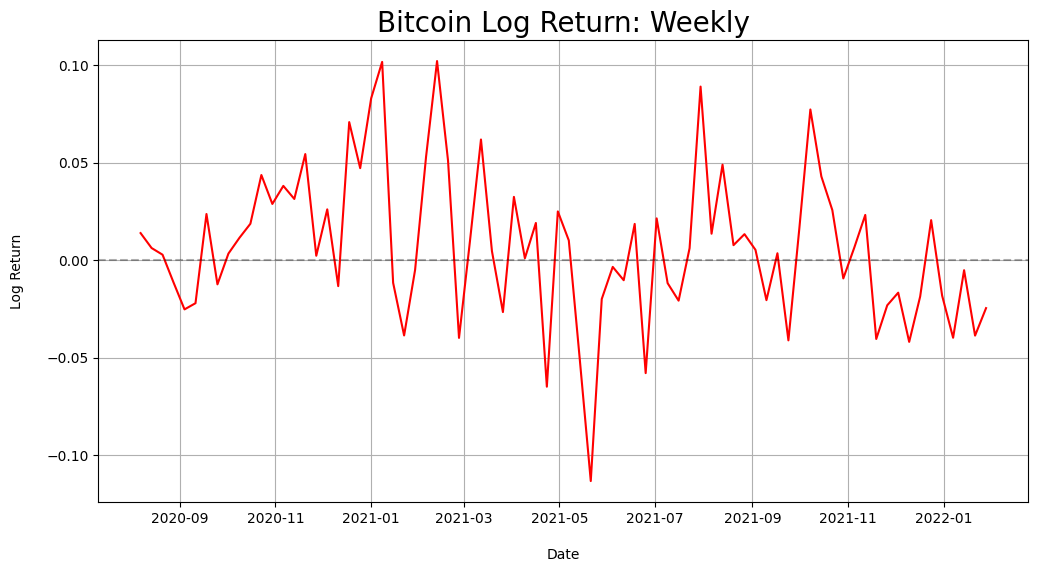

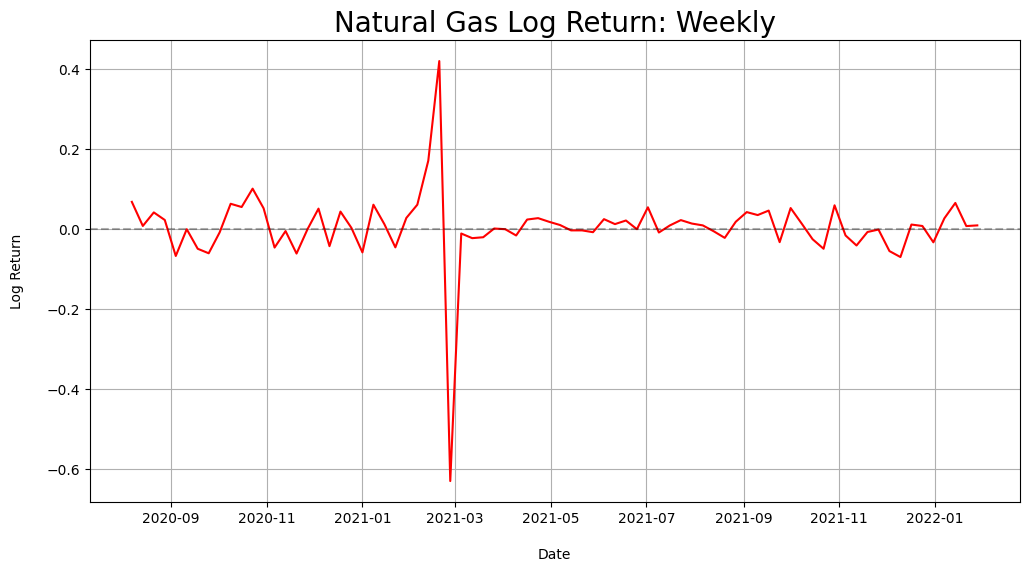

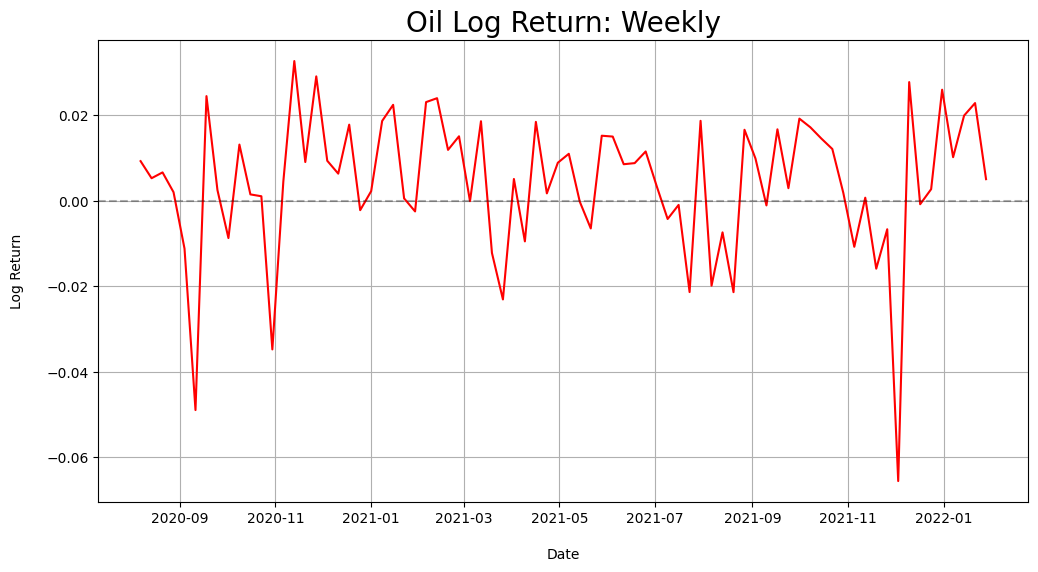

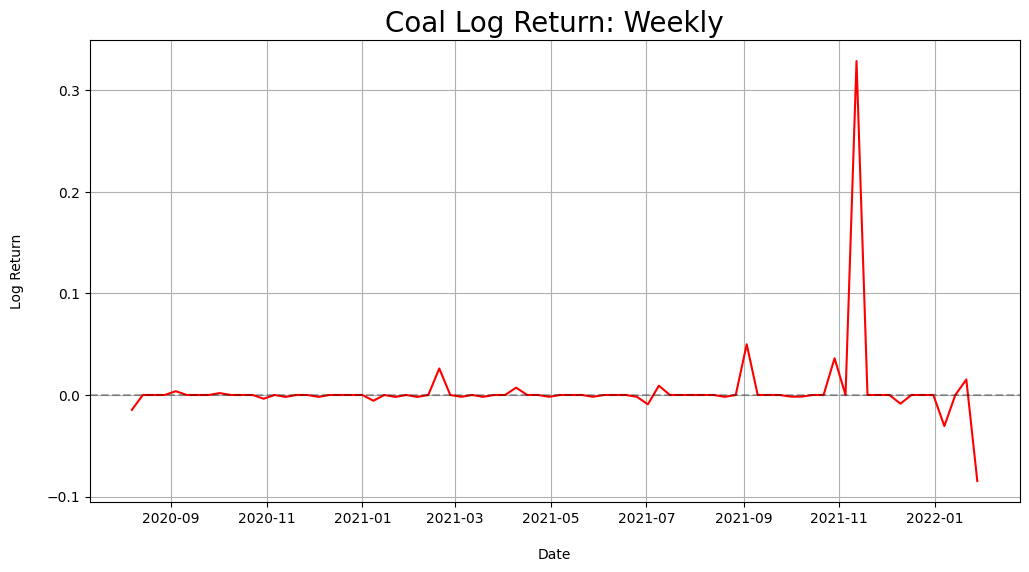

In [206]:
plt.figure(figsize=(12,6))
bitcoin_return, = plt.plot(bitcoin_return_df, color='red')
plt.title('Bitcoin Log Return: Weekly', fontsize=20)
plt.ylabel('Log Return', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.grid()
#plt.savefig('weekly bitcoin returns.png')

plt.figure(figsize=(12,6))
gas_return, = plt.plot(gas_return_df, color='red')
plt.title('Natural Gas Log Return: Weekly', fontsize=20)
plt.ylabel('Log Return',labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.grid()
#plt.savefig('weekly ng returns.png')


plt.figure(figsize=(12,6))
oil_return, = plt.plot(oil_return_df, color='red')
plt.title('Oil Log Return: Weekly', fontsize=20)
plt.ylabel('Log Return', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.grid()
#plt.savefig('weekly oil returns.png')

plt.figure(figsize=(12,6))
coal_return, = plt.plot(coal_return_df, color='red')
plt.title('Coal Log Return: Weekly', fontsize=20)
plt.ylabel('Log Return', labelpad=16.0)
plt.xlabel('Date', labelpad=16.0)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.grid()
#plt.savefig('weekly coal returns.png')

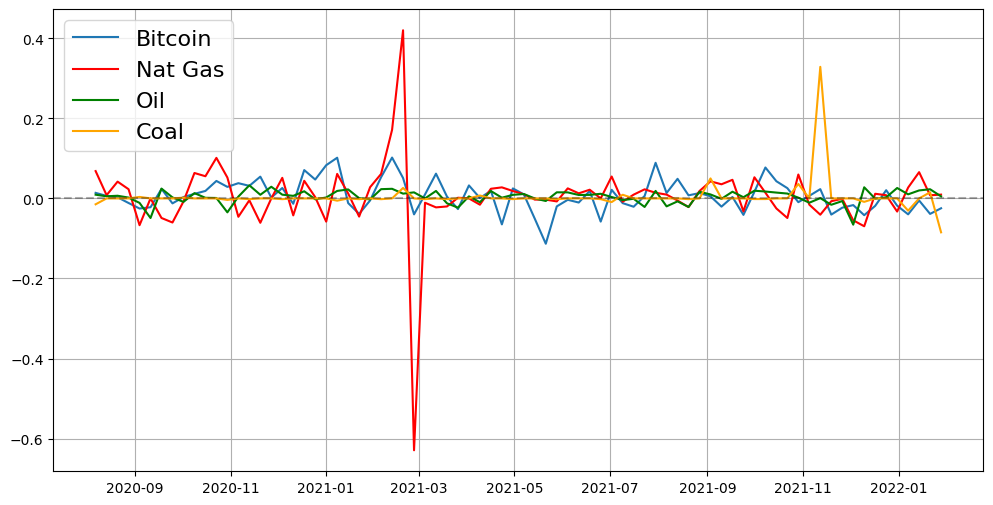

In [210]:
#Plot Returns
plt.figure(figsize=(12,6))
bitcoin, = plt.plot(var_df['Bitcoin Return'])
gas, = plt.plot(var_df['Nat Gas Return'], color='red')
oil, = plt.plot(var_df['Oil Return'], color='green')
coal, = plt.plot(var_df['Coal Return'], color='orange')
plt.axhline(0, linestyle='--', color='k', alpha=0.3)
plt.legend(['Bitcoin', 'Nat Gas', 'Oil', 'Coal'], fontsize=16)
plt.grid()
#plt.savefig('weekly returns overlay.png')

# 

# VAR Model Fit & Results

In [216]:
desc_stats_w = ds.describe(var_df).round(5)
desc_stats_w.head(15)
#desc_stats_w.to_csv(r'C:\Users\Anthony\Desktop\Disso images\tables\desc_stats_w.csv')

C:\Users\Anthony\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\descriptivestats.py:418: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_res = stats.mode(ser.dropna())


In [217]:
corr_w = var_df.corr(method='spearman').round(2)
#corr_w.to_csv(r'C:\Users\Anthony\Desktop\Disso images\tables\corr_w.csv')

### VAR Fit & Results: Model 1 

In [161]:
#Fit VAR Model
var_df = var_df[['Bitcoin Return','Nat Gas Return','Oil Return', 'Coal Return']]

In [162]:
model = VAR(var_df)

C:\Users\Anthony\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [163]:
model_fit = model.fit(maxlags=6)

In [164]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 17, Sep, 2022
Time:                     23:30:12
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -21.8349
Nobs:                     72.0000    HQIC:                  -23.7381
Log likelihood:           591.236    FPE:                1.57138e-11
AIC:                     -24.9970    Det(Omega_mle):     4.77007e-12
--------------------------------------------------------------------
Results for equation Bitcoin Return
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                     0.006711         0.006041            1.111           0.267
L1.Bitcoin Return         0.396784         0.152649            2.599           0.009
L1.Nat Gas Return        -0.058510 

### JB Non-Normality test - test for normal-distributed errors

In [230]:
test = model_fit.to_latex

AttributeError: 'VARResults' object has no attribute 'to_latex'

In [227]:
jb_test_model = model_fit.test_normality()
jb_test_model.summary()

Test statistic,Critical value,p-value,df
5137.,15.51,0.000,8


### Portmanteau Test for Residual Autocorrelation

In [228]:
wh_test_model = model_fit.test_whiteness()
wh_test_model.summary()


Test statistic,Critical value,p-value,df
64.64,83.68,0.454,64


In [229]:
model_fit.is_stable()

True

### Granger Causality Tests

In [220]:
gc_test_bitcoin_5 = model_fit.test_causality('Nat Gas Return', ['Bitcoin Return'], kind='wald')
gc_test_bitcoin_5.summary()

Test statistic,Critical value,p-value,df
11.09,12.59,0.086,6


In [222]:
gc_test_bitcoin_10 = model_fit.test_causality('Nat Gas Return', ['Bitcoin Return'], kind='wald', signif=0.1)
gc_test_bitcoin_10.summary()

Test statistic,Critical value,p-value,df
11.09,10.64,0.086,6


In [225]:
gc_test_gas_5 = model_fit.test_causality('Bitcoin Return', ['Nat Gas Return'], kind='wald')
gc_test_gas_5.summary()

Test statistic,Critical value,p-value,df
4.615,12.59,0.594,6


In [226]:
gc_test_gas_10 = model_fit.test_causality('Bitcoin Return', ['Nat Gas Return'], kind='wald', signif=0.1)
gc_test_gas_10.summary()

Test statistic,Critical value,p-value,df
4.615,10.64,0.594,6


### Impulse Response Function Analysis

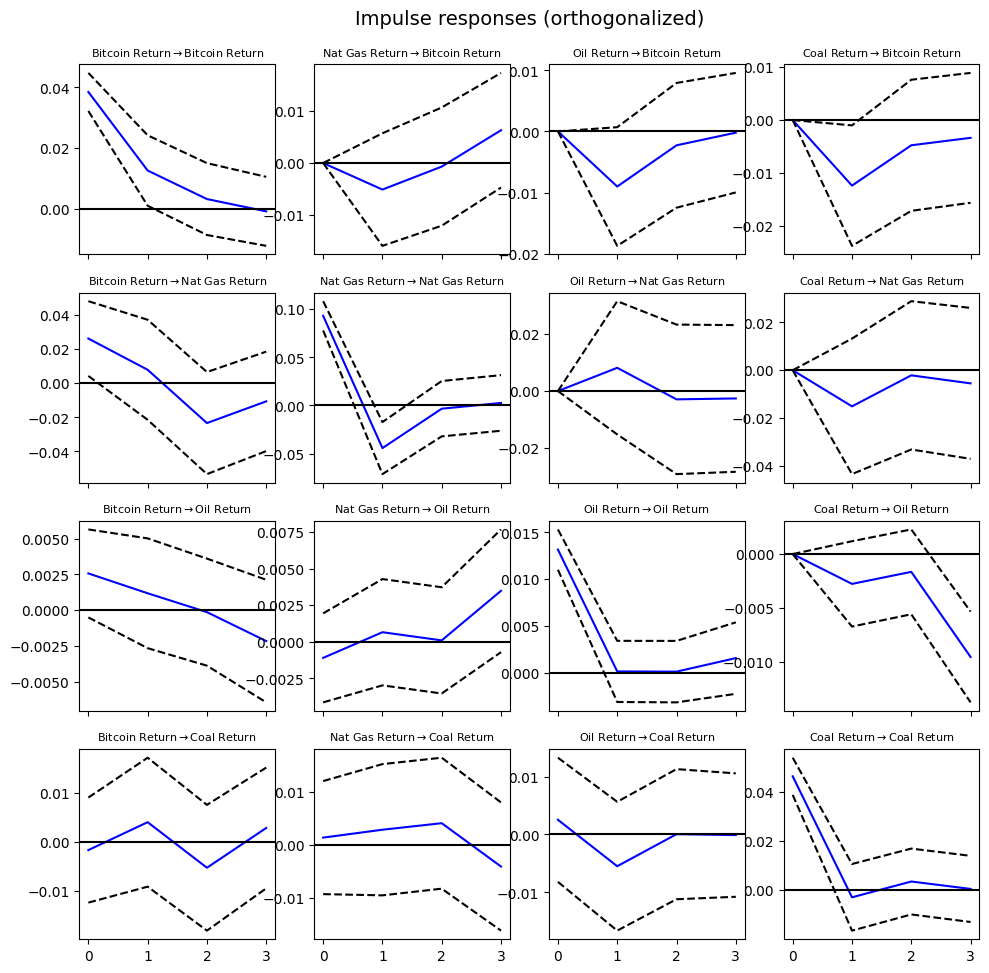

In [219]:
irf_orth = model_fit.irf(periods=3)
irf_orth.plot(orth=True, subplot_params={'fontsize' : 8})
#plt.savefig('weekly impulse.png')

# OLS Fit & Results

### Create Lagged Variables

In [170]:
ind = pd.date_range(start='2020-08-07', end='2022-01-28')
lag_df = var_df.assign()
 

# Drop NaN values
t1_df = lag_df.shift(1).dropna()
t2_df = lag_df.shift(2).dropna()
t3_df = lag_df.shift(3).dropna()

### Variables for Lagged Linear Regression Experiments

In [171]:
# (t-1 for bitcoin as independent) Create dataframe with Bitcoin as independent variable and Gas as dependent variable

#X variables
t_bit_x_df= var_df.drop('Nat Gas Return',axis=1)
t1_bit_x_df = t_bit_x_df.merge(t1_df, how='left', on=['Date']).drop('Nat Gas Return', axis=1)
t1_bit_x_df = t1_bit_x_df.rename(columns={'Bitcoin Return_x':'Bitcoin Return', 'Oil Return_x':'Oil Return', 'Coal Return_x':'Coal Return', 'Bitcoin Return_y':'Bitcoin Return (t-1)', 'Oil Return_y':'Oil Return (t-1)', 'Coal Return_y':'Coal Return (t-1)'})
t1_bit_x_df.head(5)

# Y Variable = gas_return_df




,Bitcoin Return,Oil Return,Coal Return,Bitcoin Return (t-1),Oil Return (t-1),Coal Return (t-1)
Date,,,,,,
2020-08-07,0.01387,0.009292,-0.014723,NaN,NaN,NaN
2020-08-14,0.00622,0.005296,0.000000,0.01387,0.009292,-0.014723
2020-08-21,0.00279,0.006657,0.000000,0.00622,0.005296,0.000000
2020-08-28,-0.01144,0.002028,0.000000,0.00279,0.006657,0.000000
2020-09-04,-0.02525,-0.011169,0.003728,-0.01144,0.002028,0.000000


In [172]:
# (t-1 for natural gas as independent) Create dataframe with Gas as independent variable and Bitcoin as dependent variable

# X variables
t_gas_x_df = var_df.drop('Bitcoin Return', axis=1)
t1_gas_x_df = t_gas_x_df.merge(t1_df, how='left', on=['Date']).drop('Bitcoin Return', axis=1)
t1_gas_x_df = t1_gas_x_df.rename(columns={'Nat Gas Return_x':'Nat Gas Return', 'Oil Return_x':'Oil Return', 'Coal Return_x':'Coal Return', 'Nat Gas Return_y':'Nat Gas Return (t-1)', 'Oil Return_y':'Oil Return (t-1)', 'Coal Return_y':'Coal Return (t-1)'})
t1_gas_x_df.head(5)

# Y variable = bitcoin_y_df


,Nat Gas Return,Oil Return,Coal Return,Nat Gas Return (t-1),Oil Return (t-1),Coal Return (t-1)
Date,,,,,,
2020-08-07,0.0683,0.009292,-0.014723,NaN,NaN,NaN
2020-08-14,0.0081,0.005296,0.000000,0.0683,0.009292,-0.014723
2020-08-21,0.0419,0.006657,0.000000,0.0081,0.005296,0.000000
2020-08-28,0.0230,0.002028,0.000000,0.0419,0.006657,0.000000
2020-09-04,-0.0669,-0.011169,0.003728,0.0230,0.002028,0.000000


In [173]:
# (t-2 for bitcoin as independent) Create dataframe with Bitcoin as independent variable and Gas as dependent variable

#X variables

t2_bit_x_df = t1_bit_x_df.merge(t2_df, how='left', on=['Date']).drop('Nat Gas Return', axis=1)
t2_bit_x_df = t2_bit_x_df.rename(columns={'Bitcoin Return_x':'Bitcoin Return', 'Oil Return_x':'Oil Return', 'Coal Return_x':'Coal Return', 'Bitcoin Return_y':'Bitcoin Return (t-2)', 'Oil Return_y':'Oil Return (t-2)', 'Coal Return_y':'Coal Return (t-2)'})
t2_bit_x_df.head(5)

# Y Variable = gas_return_df


,Bitcoin Return,Oil Return,Coal Return,Bitcoin Return (t-1),Oil Return (t-1),Coal Return (t-1),Bitcoin Return (t-2),Oil Return (t-2),Coal Return (t-2)
Date,,,,,,,,,
2020-08-07,0.01387,0.009292,-0.014723,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-14,0.00622,0.005296,0.000000,0.01387,0.009292,-0.014723,NaN,NaN,NaN
2020-08-21,0.00279,0.006657,0.000000,0.00622,0.005296,0.000000,0.01387,0.009292,-0.014723
2020-08-28,-0.01144,0.002028,0.000000,0.00279,0.006657,0.000000,0.00622,0.005296,0.000000
2020-09-04,-0.02525,-0.011169,0.003728,-0.01144,0.002028,0.000000,0.00279,0.006657,0.000000


In [174]:
# (t-2 for natural gas as independent) Create dataframe with Gas as independent variable and Bitcoin as dependent variable

# X variables

t2_gas_x_df = t1_gas_x_df.merge(t2_df, how='left', on=['Date']).drop('Bitcoin Return', axis=1)
t2_gas_x_df = t2_gas_x_df.rename(columns={'Nat Gas Return_x':'Nat Gas Return', 'Oil Return_x':'Oil Return', 'Coal Return_x':'Coal Return', 'Nat Gas Return_y':'Nat Gas Return (t-2)', 'Oil Return_y':'Oil Return (t-2)', 'Coal Return_y':'Coal Return (t-2)'})
t2_gas_x_df.head(5)

# Y variable = bitcoin_y_df

,Nat Gas Return,Oil Return,Coal Return,Nat Gas Return (t-1),Oil Return (t-1),Coal Return (t-1),Nat Gas Return (t-2),Oil Return (t-2),Coal Return (t-2)
Date,,,,,,,,,
2020-08-07,0.0683,0.009292,-0.014723,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-14,0.0081,0.005296,0.000000,0.0683,0.009292,-0.014723,NaN,NaN,NaN
2020-08-21,0.0419,0.006657,0.000000,0.0081,0.005296,0.000000,0.0683,0.009292,-0.014723
2020-08-28,0.0230,0.002028,0.000000,0.0419,0.006657,0.000000,0.0081,0.005296,0.000000
2020-09-04,-0.0669,-0.011169,0.003728,0.0230,0.002028,0.000000,0.0419,0.006657,0.000000


In [175]:
# (t-3 for bitcoin as independent) Create dataframe with Bitcoin as independent variable and Gas as dependent variable

#X variables

t3_bit_x_df = t2_bit_x_df.merge(t3_df, how='left', on=['Date']).drop('Nat Gas Return', axis=1)
t3_bit_x_df = t3_bit_x_df.rename(columns={'Bitcoin Return_x':'Bitcoin Return', 'Oil Return_x':'Oil Return', 'Coal Return_x':'Coal Return','Bitcoin Return_y':'Bitcoin Return (t-3)', 'Oil Return_y':'Oil Return (t-3)', 'Coal Return_y':'Coal Return (t-3)'})
t3_bit_x_df.head(5)

# Y Variable = gas_return_df

,Bitcoin Return,Oil Return,Coal Return,Bitcoin Return (t-1),Oil Return (t-1),Coal Return (t-1),Bitcoin Return (t-2),Oil Return (t-2),Coal Return (t-2),Bitcoin Return (t-3),Oil Return (t-3),Coal Return (t-3)
Date,,,,,,,,,,,,
2020-08-07,0.01387,0.009292,-0.014723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-14,0.00622,0.005296,0.000000,0.01387,0.009292,-0.014723,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-21,0.00279,0.006657,0.000000,0.00622,0.005296,0.000000,0.01387,0.009292,-0.014723,NaN,NaN,NaN
2020-08-28,-0.01144,0.002028,0.000000,0.00279,0.006657,0.000000,0.00622,0.005296,0.000000,0.01387,0.009292,-0.014723
2020-09-04,-0.02525,-0.011169,0.003728,-0.01144,0.002028,0.000000,0.00279,0.006657,0.000000,0.00622,0.005296,0.000000


In [176]:
# (t-3 for natural gas as independent) Create dataframe with Gas as independent variable and Bitcoin as dependent variable

# X variables

t3_gas_x_df = t2_gas_x_df.merge(t3_df, how='left', on=['Date']).drop('Bitcoin Return', axis=1)
t3_gas_x_df = t3_gas_x_df.rename(columns={'Nat Gas Return_x':'Nat Gas Return', 'Oil Return_x':'Oil Return', 'Coal Return_x':'Coal Return','Nat Gas Return_y':'Nat Gas Return (t-3)', 'Oil Return_y':'Oil Return (t-3)', 'Coal Return_y':'Coal Return (t-3)'})
t3_gas_x_df.head(5)

# Y variable = bitcoin_y_df


,Nat Gas Return,Oil Return,Coal Return,Nat Gas Return (t-1),Oil Return (t-1),Coal Return (t-1),Nat Gas Return (t-2),Oil Return (t-2),Coal Return (t-2),Nat Gas Return (t-3),Oil Return (t-3),Coal Return (t-3)
Date,,,,,,,,,,,,
2020-08-07,0.0683,0.009292,-0.014723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-14,0.0081,0.005296,0.000000,0.0683,0.009292,-0.014723,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-21,0.0419,0.006657,0.000000,0.0081,0.005296,0.000000,0.0683,0.009292,-0.014723,NaN,NaN,NaN
2020-08-28,0.0230,0.002028,0.000000,0.0419,0.006657,0.000000,0.0081,0.005296,0.000000,0.0683,0.009292,-0.014723
2020-09-04,-0.0669,-0.011169,0.003728,0.0230,0.002028,0.000000,0.0419,0.006657,0.000000,0.0081,0.005296,0.000000


### Correlation Matrix

In [240]:
corr_w = var_df.corr(method='spearman').round(4)
corr_w.to_latex
print(corr_w.to_latex (index=True))

\begin{tabular}{lrrrr}
\toprule
{} &  Bitcoin Return &  Nat Gas Return &  Oil Return &  Coal Return \\
\midrule
Bitcoin Return &          1.0000 &          0.2547 &      0.2772 &      -0.0715 \\
Nat Gas Return &          0.2547 &          1.0000 &      0.2012 &      -0.1216 \\
Oil Return     &          0.2772 &          0.2012 &      1.0000 &      -0.1684 \\
Coal Return    &         -0.0715 &         -0.1216 &     -0.1684 &       1.0000 \\
\bottomrule
\end{tabular}



C:\Users\Anthony\AppData\Local\Temp\ipykernel_7480\4239775847.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(corr_w.to_latex (index=True))


In [178]:
#t-1 merge
a = var_df.merge(t1_bit_x_df['Bitcoin Return (t-1)'], how='left', on=['Date'])
b = a.merge(t1_gas_x_df['Nat Gas Return (t-1)'], how='left', on=['Date'])
c = b.merge(t1_gas_x_df['Oil Return (t-1)'], how='left', on=['Date'])
d = c.merge(t1_gas_x_df['Coal Return (t-1)'], how='left', on=['Date'])
#d.head(5)

#t-2 merge
e = d.merge(t2_bit_x_df['Bitcoin Return (t-2)'], how='left', on=['Date'])
f = e.merge(t2_gas_x_df['Nat Gas Return (t-2)'], how='left', on=['Date'])
g = f.merge(t2_gas_x_df['Oil Return (t-2)'], how='left', on=['Date'])
h = g.merge(t2_gas_x_df['Coal Return (t-2)'], how='left', on=['Date'])
#h.head(5)

#t-3 merge
i = h.merge(t3_bit_x_df['Bitcoin Return (t-3)'], how='left', on=['Date'])
j = i.merge(t3_gas_x_df['Nat Gas Return (t-3)'], how='left', on=['Date'])
k = j.merge(t3_gas_x_df['Oil Return (t-3)'], how='left', on=['Date'])
l = k.merge(t3_gas_x_df['Coal Return (t-3)'], how='left', on=['Date'])
#l.head(5)
                        
l.corr(method='spearman').round(4)

,Bitcoin Return,Nat Gas Return,Oil Return,Coal Return,Bitcoin Return (t-1),Nat Gas Return (t-1),Oil Return (t-1),Coal Return (t-1),Bitcoin Return (t-2),Nat Gas Return (t-2),Oil Return (t-2),Coal Return (t-2),Bitcoin Return (t-3),Nat Gas Return (t-3),Oil Return (t-3),Coal Return (t-3)
Bitcoin Return,1.00,0.25,0.28,-0.07,0.28,0.09,-0.10,-0.21,0.13,-0.00,0.01,-0.06,0.07,0.07,0.03,0.08
Nat Gas Return,0.25,1.00,0.20,-0.12,-0.12,0.16,0.15,-0.04,0.01,-0.04,0.04,-0.02,-0.06,0.05,0.03,-0.10
Oil Return,0.28,0.20,1.00,-0.17,0.06,0.05,0.10,-0.18,-0.09,-0.02,0.04,-0.18,-0.10,-0.01,0.10,0.06
Coal Return,-0.07,-0.12,-0.17,1.00,0.17,0.16,-0.04,-0.08,-0.10,-0.09,0.07,-0.04,0.04,-0.18,-0.18,-0.05
Bitcoin Return (t-1),0.28,-0.12,0.06,0.17,1.00,0.26,0.28,-0.11,0.27,0.09,-0.08,-0.18,0.13,0.02,0.03,-0.05
Nat Gas Return (t-1),0.09,0.16,0.05,0.16,0.26,1.00,0.20,-0.12,-0.12,0.16,0.15,-0.04,0.01,-0.05,0.04,-0.02
Oil Return (t-1),-0.10,0.15,0.10,-0.04,0.28,0.20,1.00,-0.17,0.06,0.04,0.10,-0.19,-0.09,-0.02,0.04,-0.18
Coal Return (t-1),-0.21,-0.04,-0.18,-0.08,-0.11,-0.12,-0.17,1.00,0.14,0.17,-0.01,-0.03,-0.12,-0.05,0.11,-0.03
Bitcoin Return (t-2),0.13,0.01,-0.09,-0.10,0.27,-0.12,0.06,0.14,1.00,0.26,0.31,-0.08,0.27,0.12,-0.06,-0.18
Nat Gas Return (t-2),-0.00,-0.04,-0.02,-0.09,0.09,0.16,0.04,0.17,0.26,1.00,0.20,-0.13,-0.12,0.16,0.15,-0.04


### Summary Statistics

In [51]:
l.describe().round(5)

,Bitcoin Return,Gas Return,Oil Return,Coal Return,Bitcoin Return (t-1),Gas Return (t-1),Oil Return (t-1),Coal Return (t-1),Bitcoin Return (t-2),Gas Return (t-2),Oil Return (t-2),Coal Return (t-2),Bitcoin Return (t-3),Gas Return (t-3),Oil Return (t-3),Coal Return (t-3)
count,78.00000,78.00000,78.00000,78.00000,77.00000,77.0000,77.00000,77.00000,76.00000,76.00000,76.00000,76.00000,75.00000,75.00000,75.00000,75.00000
mean,0.00666,0.00516,0.00423,0.00384,0.00706,0.0051,0.00422,0.00499,0.00767,0.00507,0.00397,0.00485,0.00784,0.00426,0.00376,0.00492
std,0.03861,0.09568,0.01664,0.03954,0.03870,0.0963,0.01674,0.03846,0.03859,0.09694,0.01671,0.03870,0.03882,0.09734,0.01672,0.03896
min,-0.11327,-0.62930,-0.06556,-0.08475,-0.11327,-0.6293,-0.06556,-0.03063,-0.11327,-0.62930,-0.06556,-0.03063,-0.11327,-0.62930,-0.06556,-0.03063
25%,-0.01853,-0.01567,-0.00104,0.00000,-0.01819,-0.0157,-0.00107,0.00000,-0.01706,-0.01680,-0.00135,0.00000,-0.01744,-0.01790,-0.00162,0.00000
50%,0.00570,0.00805,0.00520,0.00000,0.00613,0.0080,0.00530,0.00000,0.00618,0.00805,0.00520,0.00000,0.00622,0.00800,0.00511,0.00000
75%,0.02549,0.02798,0.01521,0.00000,0.02566,0.0281,0.01524,0.00000,0.02576,0.02990,0.01514,0.00000,0.02586,0.02785,0.01507,0.00000
max,0.10208,0.42010,0.03271,0.32878,0.10208,0.4201,0.03271,0.32878,0.10208,0.42010,0.03271,0.32878,0.10208,0.42010,0.03271,0.32878


In [179]:
ds.describe(l).round(5)

C:\Users\Anthony\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\descriptivestats.py:418: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_res = stats.mode(ser.dropna())


,Bitcoin Return,Nat Gas Return,Oil Return,Coal Return,Bitcoin Return (t-1),Nat Gas Return (t-1),Oil Return (t-1),Coal Return (t-1),Bitcoin Return (t-2),Nat Gas Return (t-2),Oil Return (t-2),Coal Return (t-2),Bitcoin Return (t-3),Nat Gas Return (t-3),Oil Return (t-3),Coal Return (t-3)
nobs,78.00000,78.00000,78.00000,78.00000,78.00000,78.00000,78.00000,78.00000,78.00000,78.00000,78.00000,78.00000,78.00000,78.00000,78.00000,78.00000
missing,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,2.00000,2.00000,2.00000,2.00000,3.00000,3.00000,3.00000,3.00000
mean,0.00666,0.00516,0.00423,0.00384,0.00706,0.00510,0.00422,0.00499,0.00767,0.00507,0.00397,0.00485,0.00784,0.00426,0.00376,0.00492
std_err,0.00050,0.00123,0.00021,0.00051,0.00050,0.00125,0.00022,0.00050,0.00051,0.00128,0.00022,0.00051,0.00052,0.00130,0.00022,0.00052
upper_ci,0.00763,0.00756,0.00465,0.00483,0.00805,0.00756,0.00464,0.00597,0.00866,0.00757,0.00440,0.00585,0.00885,0.00681,0.00419,0.00593
lower_ci,0.00569,0.00276,0.00381,0.00284,0.00608,0.00265,0.00379,0.00401,0.00667,0.00257,0.00354,0.00385,0.00682,0.00172,0.00332,0.00390
std,0.03861,0.09568,0.01664,0.03954,0.03870,0.09630,0.01674,0.03846,0.03859,0.09694,0.01671,0.03870,0.03882,0.09734,0.01672,0.03896
iqr,0.04402,0.04365,0.01625,0.00000,0.04385,0.04380,0.01631,0.00000,0.04282,0.04670,0.01649,0.00000,0.04329,0.04575,0.01670,0.00000
iqr_normal,0.03263,0.03236,0.01204,0.00000,0.03251,0.03247,0.01209,0.00000,0.03174,0.03462,0.01222,0.00000,0.03209,0.03391,0.01238,0.00000
mad,0.02913,0.04364,0.01190,0.01143,0.02912,0.04415,0.01205,0.01137,0.02894,0.04470,0.01197,0.01127,0.02916,0.04450,0.01193,0.01141


In [234]:
table = ds.describe(var_df).round(4)

C:\Users\Anthony\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\descriptivestats.py:418: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_res = stats.mode(ser.dropna())


In [239]:
print(table.to_latex (index=True))

\begin{tabular}{lrrrr}
\toprule
{} &  Bitcoin Return &  Nat Gas Return &  Oil Return &  Coal Return \\
\midrule
nobs             &         78.0000 &         78.0000 &     78.0000 &      78.0000 \\
missing          &          0.0000 &          0.0000 &      0.0000 &       0.0000 \\
mean             &          0.0067 &          0.0052 &      0.0042 &       0.0038 \\
std\_err          &          0.0005 &          0.0012 &      0.0002 &       0.0005 \\
upper\_ci         &          0.0076 &          0.0076 &      0.0046 &       0.0048 \\
lower\_ci         &          0.0057 &          0.0028 &      0.0038 &       0.0028 \\
std              &          0.0386 &          0.0957 &      0.0166 &       0.0395 \\
iqr              &          0.0440 &          0.0436 &      0.0162 &       0.0000 \\
iqr\_normal       &          0.0326 &          0.0324 &      0.0120 &       0.0000 \\
mad              &          0.0291 &          0.0436 &      0.0119 &       0.0114 \\
mad\_normal       &          0.036

C:\Users\Anthony\AppData\Local\Temp\ipykernel_7480\4245084456.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(table.to_latex (index=True))


### OLS (T)

In [180]:
# Y Variable = gas_return_df
# X variable = t_bitcoin_x_df

# OLS Fit & Results
t_bit_x_df = sm.add_constant(t_bit_x_df)
results = sm.OLS(gas_return_df, t_bit_x_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Nat Gas Return   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     2.147
Date:                Sat, 17 Sep 2022   Prob (F-statistic):              0.102
Time:                        23:35:22   Log-Likelihood:                 76.130
No. Observations:                  78   AIC:                            -144.3
Df Residuals:                      74   BIC:                            -134.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0012      0.011      0.106      0.916      -0.021       0.023
Bitcoin Return     0.7128      0.286      2.490      0.015       0.143       1.283
Oil Return        -0.1087      0.663     -0.164      0.870      -1.429       1.212
Coal Return       -0.0782      0.271     -0.289      0.774      -0.618       0.461
==============================================================================
Omnibus:                       82.925   Durbin-Watson:                   2.440
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2184.673
Skew:                          -2.702   Prob(JB):                         0.00
Kurtosis:                      28.357   Cond. No.                         63.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
# Y variable
t_drop_oil_df = var_df.drop('Oil Return', axis=1)
t_drop_coal_df = t_drop_oil_df.drop('Coal Return', axis=1)
bitcoin_y_df = t_drop_coal_df.drop('Nat Gas Return', axis=1)
# X variables = t_gas_x_df


# OLS Fit & Results
t_gas_x_df = sm.add_constant(t_gas_x_df)
results_2 = sm.OLS(bitcoin_y_df, t_gas_x_df).fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Bitcoin Return   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     4.022
Date:                Sat, 17 Sep 2022   Prob (F-statistic):             0.0104
Time:                        23:35:42   Log-Likelihood:                 149.55
No. Observations:                  78   AIC:                            -291.1
Df Residuals:                      74   BIC:                            -281.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0035      0.004      0.809      0.421      -0.005       0.012
Nat Gas Return     0.1085      0.044      2.490      0.015       0.022       0.195
Oil Return         0.5493      0.251      2.191      0.032       0.050       1.049
Coal Return        0.0790      0.105      0.750      0.455      -0.131       0.289
==============================================================================
Omnibus:                        1.987   Durbin-Watson:                   1.256
Prob(Omnibus):                  0.370   Jarque-Bera (JB):                1.441
Skew:                          -0.038   Prob(JB):                        0.487
Kurtosis:                       3.661   Cond. No.                         60.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLS (T-1)

In [187]:
# OLS Fit & Results
t1_bit_x_df = sm.add_constant(t1_bit_x_df)
results_bit_t1 = sm.OLS(gas_return_df, t1_bit_x_df, missing='drop').fit()
results_bit_t1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Nat Gas Return   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     1.462
Date:                Sun, 18 Sep 2022   Prob (F-statistic):              0.204
Time:                        01:37:20   Log-Likelihood:                 76.211
No. Observations:                  77   AIC:                            -138.4
Df Residuals:                      70   BIC:                            -122.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0021      0.012     -0.180      0.858      -0.026       0.021
Bitcoin Return           0.8219      0.312      2.638      0.010       0.200       1.443
Oil Return              -0.1806      0.674     -0.268      0.790      -1.525       1.163
Coal Return             -0.0158      0.276     -0.057      0.954      -0.565       0.534
Bitcoin Return (t-1)    -0.2984      0.312     -0.956      0.343      -0.921       0.324
Oil Return (t-1)         0.9903      0.680      1.455      0.150      -0.367       2.347
Coal Return (t-1)       -0.0396      0.290     -0.137      0.892      -0.618       0.538
==============================================================================
Omnibus:                       80.344   Durbin-Watson:                   2.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2142.919
Skew:                          -2.587   Prob(JB):                         0.00
Kurtosis:                      28.321   Cond. No.                         65.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

T-stat: 
With a p-value of 0.01, the contemporaneous Bitcoin Log variable is again the only coefficent that is able to demonstrate any level of signficance in the natural gas return equation. Hence, we reject the H0 at the 5% signficance level and the 1% significance level indicating a strong association between bitcoin returns and natural gas returns.

The lagged bitcoin return variable suggests an inverse relationship with natural gas returns which goes against the relationship that we have hypothesized. Dispite this result, p-value indicates that this coefficent estimate is of virtually no signficance.

F-statstic: 
The f-statistic probability shows that this specification does not satisifactory. We fail to accept H0 at the highest significance level of 10% and conclude that a specification with only the intercept would be statistically superior. 

### Normality test

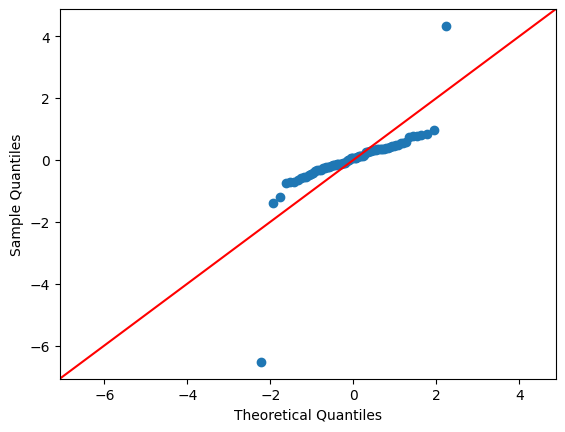

In [115]:
#QQ plot

residuals = results_bit_t1.resid
fig = sm.qqplot(residuals, stats.norm, fit=True, line="45")
plt.show()



In [114]:
# JB Test
jarque_bera(residuals)

(2142.918508798088, 0.0, -2.5871618585365006, 28.3209207210924)

In [112]:
durbin_watson(residuals)

2.4841907811724435

DB < 4 therefore there is no autocorrelection in the residuals

In [182]:
# OLS Fit & Results
t1_gas_x_df = sm.add_constant(t1_gas_x_df)
results_gas_t1 = sm.OLS(bitcoin_y_df, t1_gas_x_df, missing='drop').fit()
results_gas_t1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Bitcoin Return   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     2.190
Date:                Sat, 17 Sep 2022   Prob (F-statistic):             0.0540
Time:                        23:36:22   Log-Likelihood:                 147.96
No. Observations:                  77   AIC:                            -281.9
Df Residuals:                      70   BIC:                            -265.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0049      0.005      1.079      0.285      -0.004       0.014
Nat Gas Return           0.1134      0.046      2.449      0.017       0.021       0.206
Oil Return               0.5083      0.259      1.962      0.054      -0.008       1.025
Coal Return              0.0678      0.108      0.629      0.532      -0.147       0.283
Nat Gas Return (t-1)     0.0148      0.046      0.323      0.748      -0.077       0.106
Oil Return (t-1)        -0.1913      0.259     -0.739      0.463      -0.708       0.325
Coal Return (t-1)       -0.1077      0.113     -0.957      0.342      -0.332       0.117
==============================================================================
Omnibus:                        2.579   Durbin-Watson:                   1.255
Prob(Omnibus):                  0.275   Jarque-Bera (JB):                2.173
Skew:                          -0.080   Prob(JB):                        0.337
Kurtosis:                       3.807   Cond. No.                         61.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLS (T-2)

In [183]:
# OLS Fit & Results
t2_gas_x_df = sm.add_constant(t2_gas_x_df)
results_bit_t2 = sm.OLS(gas_return_df, t2_bit_x_df, missing='drop').fit()
results_bit_t2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Nat Gas Return   R-squared (uncentered):                   0.147
Model:                            OLS   Adj. R-squared (uncentered):              0.032
Method:                 Least Squares   F-statistic:                              1.279
Date:                Sat, 17 Sep 2022   Prob (F-statistic):                       0.265
Time:                        23:36:30   Log-Likelihood:                          76.188
No. Observations:                  76   AIC:                                     -134.4
Df Residuals:                      67   BIC:                                     -113.4
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Bitcoin Return           0.8064      0.311      2.593      0.012       0.186       1.427
Oil Return              -0.2214      0.669     -0.331      0.742      -1.557       1.115
Coal Return             -0.0530      0.276     -0.192      0.849      -0.605       0.499
Bitcoin Return (t-1)    -0.1077      0.336     -0.320      0.750      -0.779       0.563
Oil Return (t-1)         0.9806      0.670      1.464      0.148      -0.357       2.318
Coal Return (t-1)       -0.0294      0.287     -0.103      0.919      -0.601       0.543
Bitcoin Return (t-2)    -0.5099      0.317     -1.609      0.112      -1.143       0.123
Oil Return (t-2)         0.2149      0.686      0.313      0.755      -1.155       1.584
Coal Return (t-2)        0.1108      0.288      0.384      0.702      -0.465       0.686
==============================================================================
Omnibus:                       67.964   Durbin-Watson:                   2.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1561.736
Skew:                          -2.035   Prob(JB):                         0.00
Kurtosis:                      24.832   Cond. No.                         3.38
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [184]:
# OLS Fit & Results
t2_gas_x_df = sm.add_constant(t2_gas_x_df)
results_gas_t2 = sm.OLS(bitcoin_y_df, t2_gas_x_df, missing='drop').fit()
results_gas_t2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Bitcoin Return   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     1.484
Date:                Sat, 17 Sep 2022   Prob (F-statistic):              0.172
Time:                        23:36:39   Log-Likelihood:                 146.00
No. Observations:                  76   AIC:                            -272.0
Df Residuals:                      66   BIC:                            -248.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0056      0.005      1.149      0.255      -0.004       0.015
Nat Gas Return           0.1077      0.048      2.234      0.029       0.011       0.204
Oil Return               0.4823      0.268      1.798      0.077      -0.053       1.018
Coal Return              0.0763      0.111      0.688      0.494      -0.145       0.298
Nat Gas Return (t-1)     0.0043      0.049      0.087      0.931      -0.094       0.103
Oil Return (t-1)        -0.1967      0.270     -0.729      0.468      -0.735       0.342
Coal Return (t-1)       -0.1117      0.116     -0.966      0.338      -0.343       0.119
Nat Gas Return (t-2)    -0.0306      0.048     -0.639      0.525      -0.126       0.065
Oil Return (t-2)         0.0192      0.269      0.071      0.943      -0.518       0.556
Coal Return (t-2)       -0.0748      0.116     -0.645      0.521      -0.306       0.157
==============================================================================
Omnibus:                        2.902   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                2.582
Skew:                          -0.111   Prob(JB):                        0.275
Kurtosis:                       3.875   Cond. No.                         65.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### OLS (T-3)

In [185]:
# OLS Fit & Results
t3_bit_x_df = sm.add_constant(t3_bit_x_df)
results_bit_t3 = sm.OLS(gas_return_df, t3_bit_x_df, missing='drop').fit()
results_bit_t3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Nat Gas Return   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.045
Date:                Sat, 17 Sep 2022   Prob (F-statistic):              0.421
Time:                        23:36:47   Log-Likelihood:                 75.801
No. Observations:                  75   AIC:                            -125.6
Df Residuals:                      62   BIC:                            -95.47
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0043      0.013      0.317      0.752      -0.023       0.031
Bitcoin Return           0.8288      0.322      2.575      0.012       0.185       1.472
Oil Return              -0.5351      0.797     -0.671      0.505      -2.129       1.059
Coal Return             -0.0207      0.288     -0.072      0.943      -0.596       0.554
Bitcoin Return (t-1)    -0.1154      0.345     -0.334      0.739      -0.806       0.575
Oil Return (t-1)         0.9969      0.711      1.402      0.166      -0.424       2.418
Coal Return (t-1)       -0.0336      0.300     -0.112      0.911      -0.632       0.565
Bitcoin Return (t-2)    -0.4905      0.350     -1.400      0.167      -1.191       0.210
Oil Return (t-2)         0.1780      0.714      0.249      0.804      -1.250       1.606
Coal Return (t-2)        0.0966      0.301      0.321      0.749      -0.505       0.699
Bitcoin Return (t-3)    -0.1892      0.330     -0.573      0.569      -0.850       0.471
Oil Return (t-3)        -0.3896      0.721     -0.540      0.591      -1.831       1.051
Coal Return (t-3)       -0.2721      0.338     -0.805      0.424      -0.947       0.403
==============================================================================
Omnibus:                       62.704   Durbin-Watson:                   2.557
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1311.049
Skew:                          -1.839   Prob(JB):                    2.04e-285
Kurtosis:                      23.150   Cond. No.                         75.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
# OLS Fit & Results
t3_gas_x_df = sm.add_constant(t3_gas_x_df)
results_gas_t3 = sm.OLS(bitcoin_y_df, t3_gas_x_df, missing='drop').fit()
results_gas_t3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Bitcoin Return   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.109
Date:                Sat, 17 Sep 2022   Prob (F-statistic):              0.369
Time:                        23:36:53   Log-Likelihood:                 143.97
No. Observations:                  75   AIC:                            -261.9
Df Residuals:                      62   BIC:                            -231.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0050      0.005      0.941      0.351      -0.006       0.016
Nat Gas Return           0.1126      0.050      2.249      0.028       0.013       0.213
Oil Return               0.5307      0.314      1.688      0.096      -0.098       1.159
Coal Return              0.0806      0.114      0.706      0.483      -0.148       0.309
Nat Gas Return (t-1)     0.0114      0.052      0.220      0.827      -0.092       0.115
Oil Return (t-1)        -0.1777      0.280     -0.634      0.528      -0.738       0.383
Coal Return (t-1)       -0.1172      0.119     -0.985      0.329      -0.355       0.121
Nat Gas Return (t-2)    -0.0177      0.052     -0.340      0.735      -0.122       0.086
Oil Return (t-2)         0.0172      0.279      0.062      0.951      -0.540       0.575
Coal Return (t-2)       -0.0718      0.120     -0.600      0.551      -0.311       0.167
Nat Gas Return (t-3)     0.0310      0.050      0.623      0.536      -0.069       0.131
Oil Return (t-3)        -0.0227      0.280     -0.081      0.935      -0.581       0.536
Coal Return (t-3)        0.0596      0.135      0.441      0.661      -0.210       0.330
==============================================================================
Omnibus:                        2.838   Durbin-Watson:                   1.222
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.442
Skew:                          -0.129   Prob(JB):                        0.295
Kurtosis:                       3.846   Cond. No.                         72.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""